In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

In [2]:
keras.__version__

'2.8.0'

In [3]:
train_path = '/content/drive/MyDrive/horse-or-human/train'
valid_path = '/content/drive/MyDrive/horse-or-human/validation'

In [4]:
train_data_gen = ImageDataGenerator(rescale = 1./255,
                                    rotation_range=0,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

In [5]:
training_data = train_data_gen.flow_from_directory(train_path,
                                   target_size = (150,150),
                                   batch_size = 32,
                                   class_mode = 'binary')

Found 1027 images belonging to 2 classes.


In [6]:
training_data.class_indices

{'horses': 0, 'humans': 1}

In [7]:
valid_datagen = ImageDataGenerator(rescale = 1./255)

In [8]:
valid_data = valid_datagen.flow_from_directory(valid_path,
                                               target_size = (150,150),
                                               batch_size = 32,
                                               class_mode = 'binary')

Found 256 images belonging to 2 classes.


In [9]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1,5,figsize = (20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

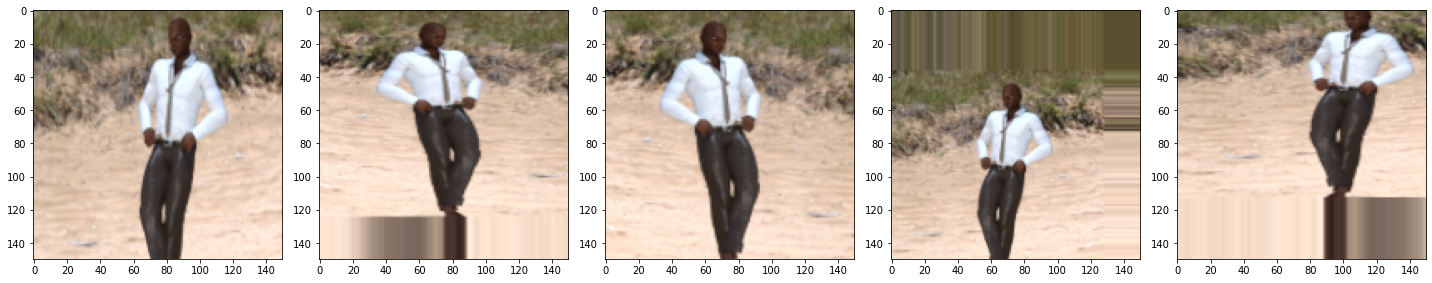

In [10]:
image = [training_data[0][0][0] for i in range(5)]
plotImages(image)

In [11]:
cnn_model = keras.models.Sequential([keras.layers.Conv2D(filters = 32, kernel_size = 3,input_shape = [150,150,3]),
                                    keras.layers.MaxPooling2D(pool_size = (2,2)),
                                    keras.layers.Conv2D(filters = 64, kernel_size= 3),
                                    keras.layers.MaxPooling2D(pool_size = (2,2)),
                                    keras.layers.Conv2D(filters = 128, kernel_size = 3),
                                    keras.layers.MaxPooling2D(pool_size = (2,2)),
                                    keras.layers.Conv2D(filters = 256,kernel_size = 3),
                                    keras.layers.MaxPooling2D(pool_size = (2,2)),
                                    
                                    keras.layers.Dropout(0.5),
                                    keras.layers.Flatten(),
                                    keras.layers.Dense(units = 128, activation = 'relu'),
                                    keras.layers.Dropout(0.1),
                                    keras.layers.Dense(units = 256,activation = 'relu'),
                                    keras.layers.Dropout(0.25),
                                    keras.layers.Dense(units = 2, activation = 'softmax')])

In [12]:
cnn_model.compile(optimizer='adam',
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])

In [13]:
model_path = '/content/drive/MyDrive/horse-or-human/horse or human predictor.h5'
checkpoint = ModelCheckpoint(model_path, monitor = 'val_accuracy', verbose = 1, save_best_only = True, mode = 'max')
callback_list = [checkpoint]

In [15]:
history = cnn_model.fit(training_data, 
                        epochs = 100,
                        verbose = 1,
                        validation_data = valid_data,
                        callbacks = callback_list)

Epoch 1/100
33/33 [==============================] - ETA: 0s - loss: 0.8203 - accuracy: 0.5443
Epoch 1: val_accuracy improved from -inf to 0.57422, saving model to /content/drive/MyDrive/horse-or-human/horse or human predictor.h5
33/33 [==============================] - 175s 5s/step - loss: 0.8203 - accuracy: 0.5443 - val_loss: 0.6200 - val_accuracy: 0.5742
Epoch 2/100
33/33 [==============================] - ETA: 0s - loss: 0.6085 - accuracy: 0.6981
Epoch 2: val_accuracy improved from 0.57422 to 0.64453, saving model to /content/drive/MyDrive/horse-or-human/horse or human predictor.h5
33/33 [==============================] - 13s 399ms/step - loss: 0.6085 - accuracy: 0.6981 - val_loss: 0.8309 - val_accuracy: 0.6445
Epoch 3/100
33/33 [==============================] - ETA: 0s - loss: 0.4987 - accuracy: 0.7722
Epoch 3: val_accuracy did not improve from 0.64453
33/33 [==============================] - 13s 382ms/step - loss: 0.4987 - accuracy: 0.7722 - val_loss: 1.8204 - val_accuracy: 0.62

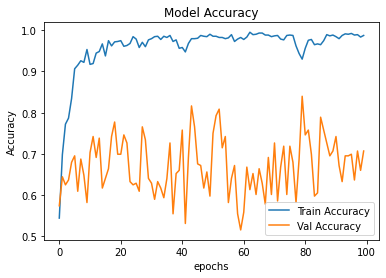

In [21]:
plt.plot(history.history['accuracy'],label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'],label = 'Val Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()


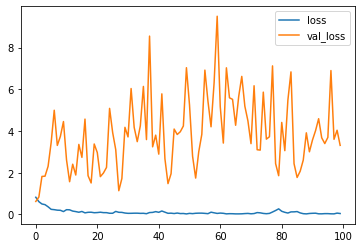

In [18]:
plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['val_loss'],label = 'val_loss')
plt.legend()
plt.show()

In [22]:
model_path1 = '/content/drive/MyDrive/horse-or-human/horse or human predictor.h5'
model_path2 = '/content/drive/MyDrive/horse-or-human/horse or human predictor.h5'
model_path3 = '/content/drive/MyDrive/horse-or-human/horse or human predictor.h5'

In [26]:
model_1 = keras.models.load_model(model_path1)
model_2 = keras.models.load_model(model_path2)
model_3 = keras.models.load_model(model_path3)

In [27]:
h1 = '/content/drive/MyDrive/horse-or-human/horse-or-human/train/horses/horse01-0.png'
h2 = '/content/drive/MyDrive/horse-or-human/horse-or-human/train/horses/horse01-1.png'
h3 = '/content/drive/MyDrive/horse-or-human/horse-or-human/train/horses/horse01-3.png'
h4 = '/content/drive/MyDrive/horse-or-human/horse-or-human/train/horses/horse01-4.png'
h5 = '/content/drive/MyDrive/horse-or-human/horse-or-human/train/horses/horse01-5.png'


hue1 = '/content/drive/MyDrive/horse-or-human/horse-or-human/train/humans/human01-00.png'
hue2 = '/content/drive/MyDrive/horse-or-human/horse-or-human/train/humans/human01-01.png'
hue3 = '/content/drive/MyDrive/horse-or-human/horse-or-human/train/humans/human01-04.png'
hue4 = '/content/drive/MyDrive/horse-or-human/horse-or-human/train/humans/human01-06.png'
hue5 = '/content/drive/MyDrive/horse-or-human/horse-or-human/train/humans/human01-11.png'

In [29]:
import numpy as np
from keras.preprocessing import image

def pred_human_horse(model, horse_or_human):
  test_image = image.load_img(horse_or_human,target_size=(150,150))
  test_image = image.img_to_array(test_image)/255
  test_image = np.expand_dims(test_image, axis = 0)

  result = model.predict(test_image).round(3)
  pred = np.argmax(result)
  print(result,"---->>>", pred)

  if pred ==0:
    print("Horse")
  else:
    print("Human")


In [35]:
for horse_or_human in [h1,h2,h3,h4,h5,hue1,hue2,hue3,hue4,hue5]:
  pred_human_horse(model1,horse_or_human)

[[1. 0.]] ---->>> 0
Horse
[[1. 0.]] ---->>> 0
Horse
[[1. 0.]] ---->>> 0
Horse
[[1. 0.]] ---->>> 0
Horse
[[1. 0.]] ---->>> 0
Horse
[[0. 1.]] ---->>> 1
Human
[[0. 1.]] ---->>> 1
Human
[[0. 1.]] ---->>> 1
Human
[[0. 1.]] ---->>> 1
Human
[[0. 1.]] ---->>> 1
Human


In [37]:
for horse_or_human in [h1,h2,h3,h4,h5,hue1,hue2,hue3,hue4,hue5]:
  pred_human_horse(model_2,horse_or_human)

[[1. 0.]] ---->>> 0
Horse
[[1. 0.]] ---->>> 0
Horse
[[1. 0.]] ---->>> 0
Horse
[[1. 0.]] ---->>> 0
Horse
[[1. 0.]] ---->>> 0
Horse
[[0. 1.]] ---->>> 1
Human
[[0. 1.]] ---->>> 1
Human
[[0. 1.]] ---->>> 1
Human
[[0. 1.]] ---->>> 1
Human
[[0. 1.]] ---->>> 1
Human


In [38]:
for horse_or_human in [h1,h2,h3,h4,h5,hue1,hue2,hue3,hue4,hue5]:
  pred_human_horse(model_3,horse_or_human)

[[1. 0.]] ---->>> 0
Horse
[[1. 0.]] ---->>> 0
Horse
[[1. 0.]] ---->>> 0
Horse
[[1. 0.]] ---->>> 0
Horse
[[1. 0.]] ---->>> 0
Horse
[[0. 1.]] ---->>> 1
Human
[[0. 1.]] ---->>> 1
Human
[[0. 1.]] ---->>> 1
Human
[[0. 1.]] ---->>> 1
Human
[[0. 1.]] ---->>> 1
Human
